Features Overview

customerID: Unique customer identifier.

gender: Customer's gender .

SeniorCitizen: Indicates if the customer is 65 or older: Yes, No

Partner: Indicates if customer has a partner .

Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

tenure: Number of months with the company.

PhoneService: Indicates if the customer subscribes to home phone service with the company: Yes, No

MultipleLines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

InternetService: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

OnlineSecurity: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

OnlineBackup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

DeviceProtection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

TechSupport: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

StreamingTV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

StreamingMovies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

PaperlessBilling: Indicates if the customer has chosen paperless billing: Yes, No

PaymentMethod: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

MonthlyCharges: Indicates the customer’s current total monthly charge for all their services from the company.

TotalCharges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

Churn: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.


In [45]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv' , sep = "," , encoding = "utf-8")

In [5]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [34]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [35]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [36]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# 1-what is the ratio between males and females in our company?

In [37]:
df['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

<Axes: ylabel='count'>

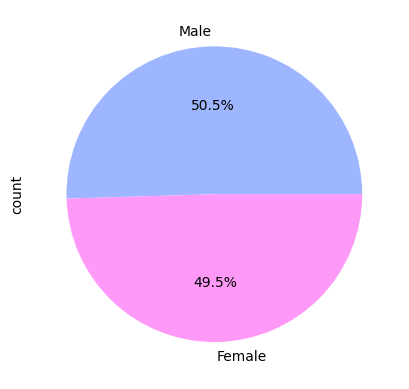

In [38]:
df['gender'].value_counts().plot(kind="pie",autopct="%1.1f%%",colors=['#9eb6ff','#ff99f8'])

<Axes: xlabel='gender', ylabel='percent'>

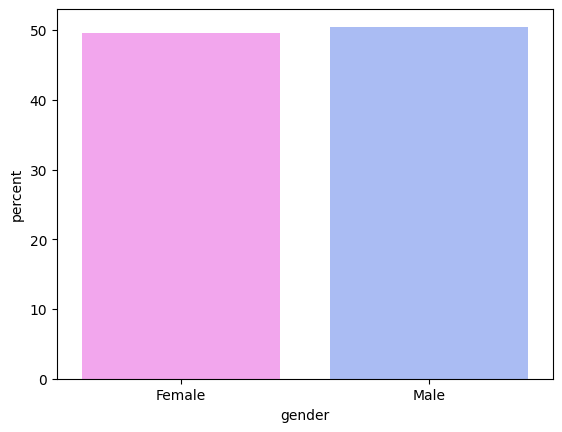

In [5]:
custom_palette = {"Female": "#ff99f8","Male": "#9eb6ff"}
sns.countplot(data=df, x="gender",hue="gender" ,stat="percent" , palette=custom_palette)

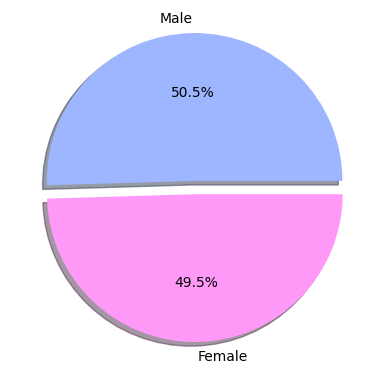

In [20]:
myexplode = [0.09, 0]
gender_counts = df['gender'].value_counts()
mycolors = ["#9eb6ff", "#ff99f8"]
plt.pie(gender_counts, labels=gender_counts.index, explode=myexplode, autopct='%1.1f%%', shadow = True , colors = mycolors)
plt.show() 

# 2-what is the ratio between Senior Citizens and others in our company?

In [39]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [22]:
df['SeniorCitizen'].replace(0,"No",inplace= True)

In [23]:
df['SeniorCitizen'].replace(1,"Yes",inplace= True)

In [54]:
df['SeniorCitizen'].value_counts()

No     5890
Yes    1142
Name: SeniorCitizen, dtype: int64

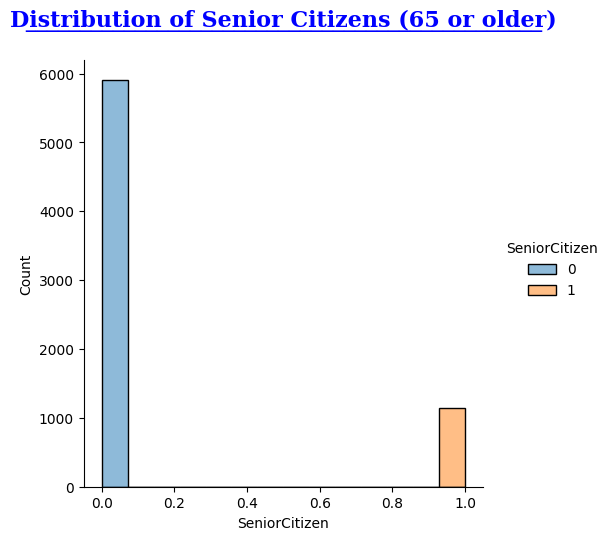

In [21]:
sns.displot( x=df['SeniorCitizen'],hue=df['SeniorCitizen'] )
title_text="Distribution of Senior Citizens (65 or older)\n" + "\u0332".join(" ")
title_font = {
    'fontsize': 16,
    'fontweight': 'bold',
    'color': 'blue',
    'family': 'serif',    
}
plt.title(title_text,fontdict=title_font)
plt.text(
    x=0.5, 
    y=1.09, 
    s='_' * len(title_text), 
    ha='center', 
    va='center', 
    transform=plt.gca().transAxes, 
    fontsize=16, 
    color='blue', 
)
plt.show()

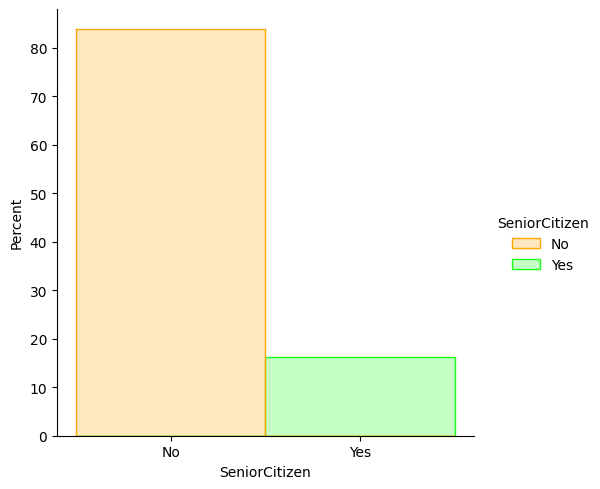

In [50]:
custom_palette = {"Yes": "#1aff1a","No": "orange"}
sns.displot(
    df, x="SeniorCitizen", hue="SeniorCitizen", 
    stat="percent", palette=custom_palette ,element="step"
)



<Axes: xlabel='SeniorCitizen', ylabel='percent'>

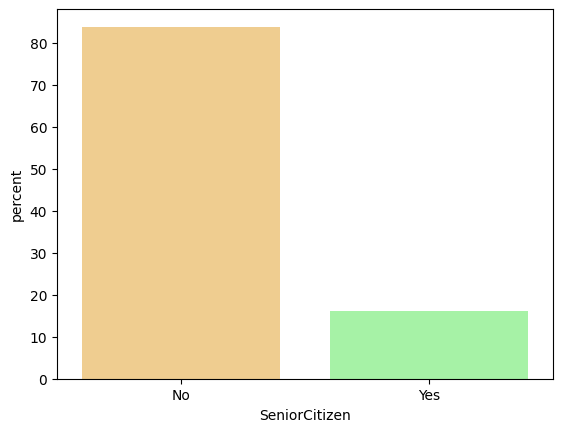

In [103]:
custom_palette = {"Yes": "#99ff99","No": "#ffd280"}
sns.countplot(data=df, x="SeniorCitizen",hue="SeniorCitizen" ,stat="percent" , palette=custom_palette)

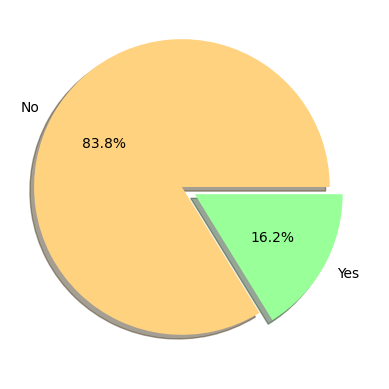

In [100]:
myexplode = [0.2, 0]
gender_counts = df['SeniorCitizen'].value_counts()
mycolors = ["#ffd280", "#99ff99"]
plt.pie(gender_counts, labels=gender_counts.index, explode=myexplode, autopct='%1.1f%%', shadow = True , colors = mycolors)
plt.show() 

# 3-what is the ratio between who has partners and not in our company?

In [44]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [45]:
df['Partner'].value_counts()

Partner
No     3641
Yes    3402
Name: count, dtype: int64

<Axes: xlabel='Partner', ylabel='Count'>

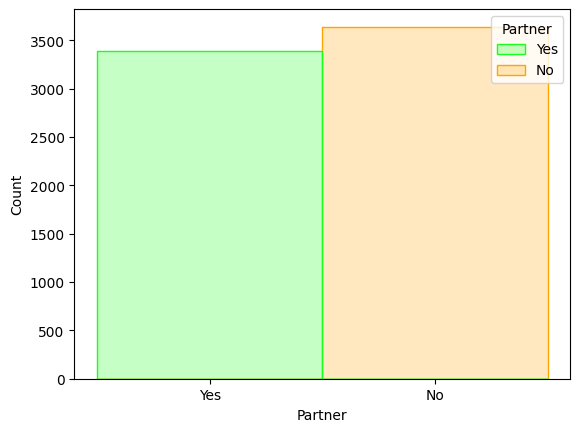

In [91]:
custom_palette = {"Yes": "#1aff1a","No": "orange"}
sns.histplot(
    df, x="Partner", hue="Partner", element="step",
    stat="count", common_norm=False, palette=custom_palette 
)

<Axes: xlabel='Partner', ylabel='percent'>

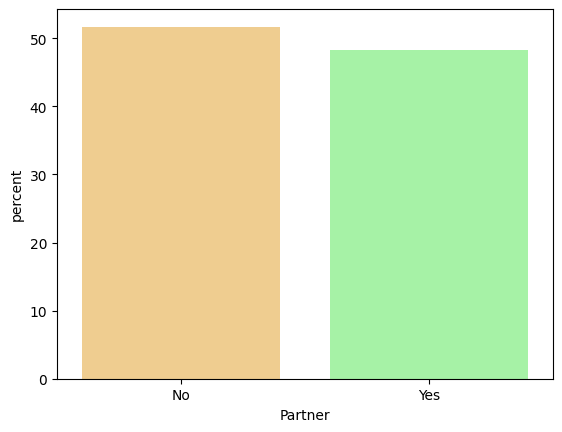

In [105]:
custom_palette = {"Yes": "#99ff99","No": "#ffd280"}
sns.countplot(data=df, x="Partner",hue="Partner" ,stat="percent" , palette=custom_palette , order=["No","Yes"])

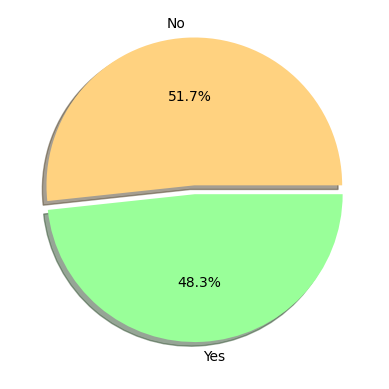

In [104]:
myexplode = [0.06, 0]
gender_counts = df['Partner'].value_counts()
mycolors = ["#ffd280", "#99ff99"]
plt.pie(gender_counts, labels=gender_counts.index, explode=myexplode, autopct='%1.1f%%', shadow = True , colors = mycolors)
plt.show() 

# 4- what is the ratio between who has dependents and not in our company?

In [47]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [48]:
df['Dependents'].value_counts()

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

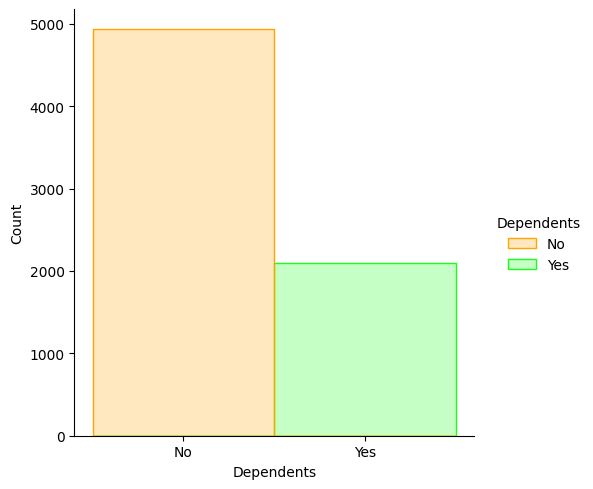

In [93]:
custom_palette = {"Yes": "#1aff1a","No": "orange"}
sns.displot( x=df['Dependents'],hue=df['Dependents'], palette=custom_palette , element="step" )


<Axes: xlabel='Dependents', ylabel='percent'>

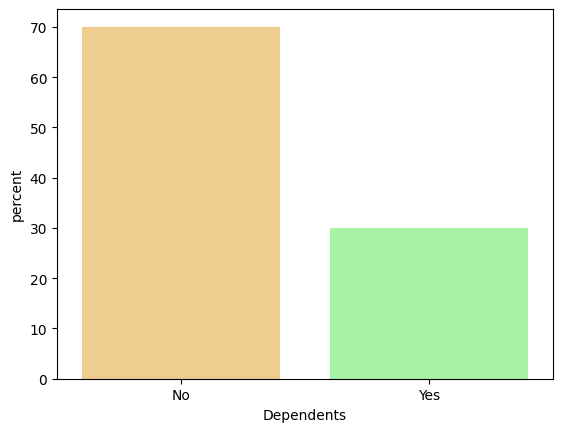

In [107]:
custom_palette = {"Yes": "#99ff99","No": "#ffd280"}
sns.countplot(data=df, x="Dependents",hue="Dependents" ,stat="percent" , palette=custom_palette , order=["No","Yes"])

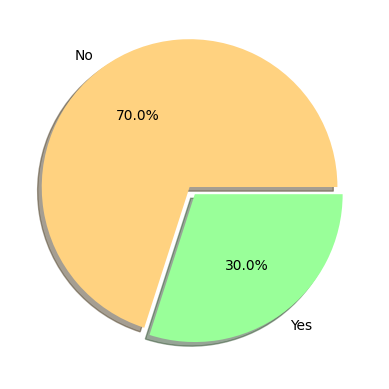

In [106]:
myexplode = [0.06, 0]
gender_counts = df['Dependents'].value_counts()
mycolors = ["#ffd280", "#99ff99"]
plt.pie(gender_counts, labels=gender_counts.index, explode=myexplode, autopct='%1.1f%%', shadow = True , colors = mycolors)
plt.show() 

# 5- what is the ratio between who has MultipleLines and not in our company?

In [50]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [51]:
df['MultipleLines'].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

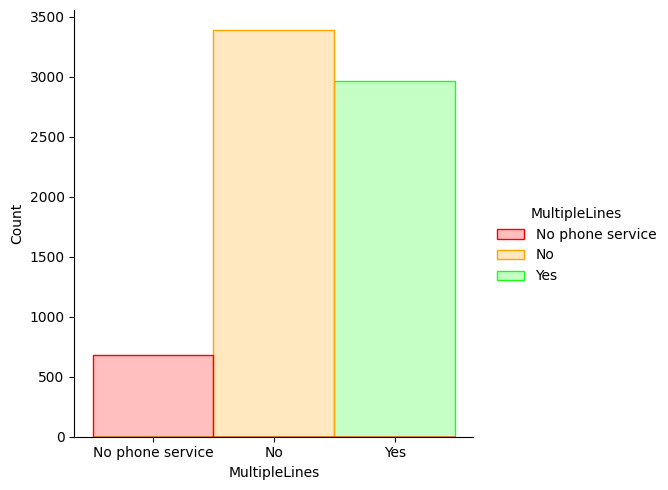

In [103]:
custom_palette = {"Yes": "#1aff1a","No": "orange","No phone service":"red"}
sns.displot( x=df['MultipleLines'],hue=df['MultipleLines'], palette=custom_palette, element="step"    )

<Axes: xlabel='MultipleLines', ylabel='count'>

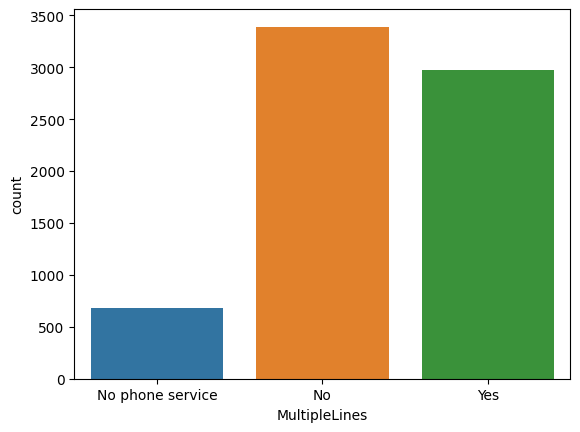

In [8]:
sns.countplot(df, x="MultipleLines", hue="MultipleLines")

<Axes: xlabel='MultipleLines', ylabel='percent'>

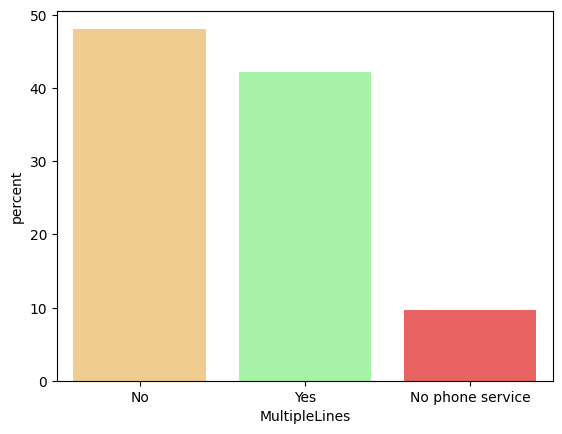

In [122]:
custom_palette = {"Yes": "#99ff99","No": "#ffd280","No phone service":"#ff4d4d"}
sns.countplot(data=df, x="MultipleLines",hue="MultipleLines" ,stat="percent" , palette=custom_palette , order=["No","Yes", "No phone service"])

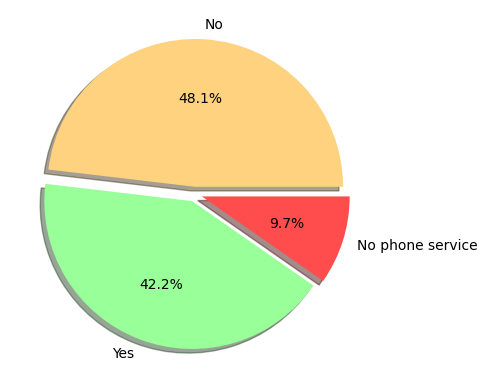

In [117]:
myexplode = [0.05, 0.05,0.05]
gender_counts = df['MultipleLines'].value_counts()
mycolors = ["#ffd280", "#99ff99","#ff4d4d"]
plt.pie(gender_counts, labels=gender_counts.index, explode=myexplode, autopct='%1.1f%%', shadow = True , colors = mycolors)
plt.show() 

# 6-Depending on the correlation matrix, which variables have a strong relationship with each other?

In [18]:
df.corr(numeric_only=True)

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


# 7-From the previous question,What is the relationship between the Internet Services and the churn rate?

In [5]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [95]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [71]:
df.groupby(['Churn'])[['InternetService']].count().T

Churn,No,Yes
InternetService,5174,1869


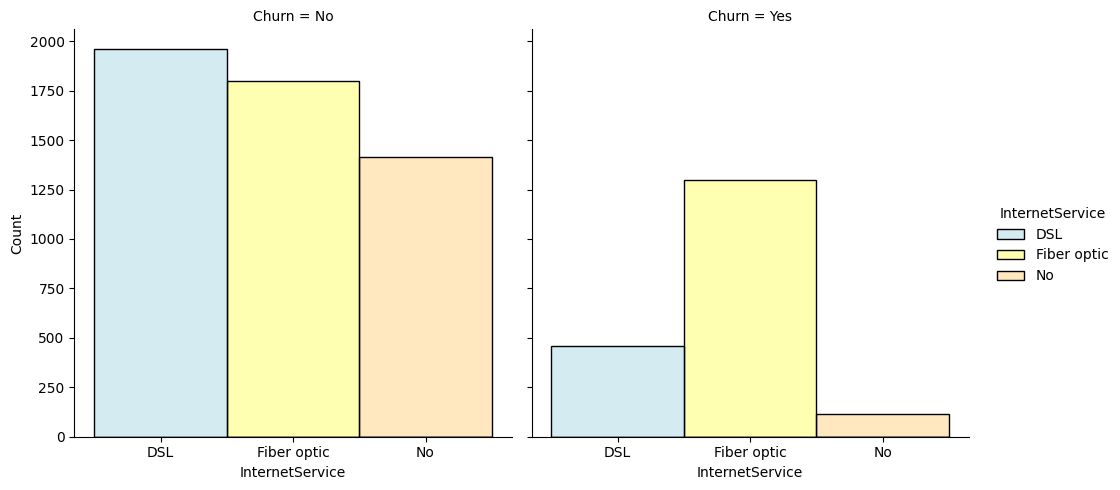

In [34]:
custom_palette = {"DSL": "Lightblue","Fiber optic":"#ffff66","No":"#ffd280"}
sns.displot(data=df, x="InternetService",hue="InternetService",col="Churn",palette=custom_palette)


<Axes: xlabel='InternetService', ylabel='percent'>

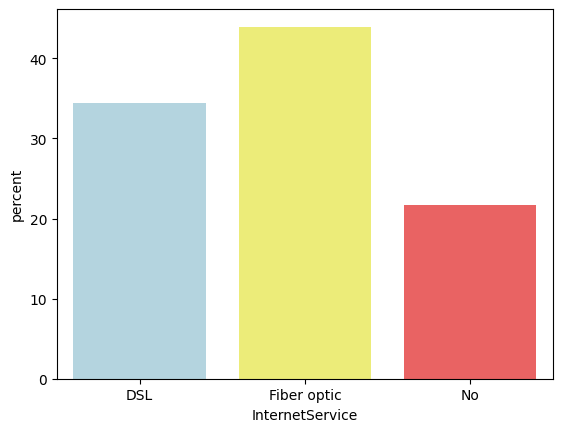

In [32]:
custom_palette = {"DSL": "Lightblue","Fiber optic":"#ffff66","No":"#ff4d4d"}
sns.countplot(data=df, x="InternetService",hue="InternetService" ,stat="percent" , palette=custom_palette )

# 8-how many Internet Services we provide in our company? - list names and ratio please 

In [25]:
df['InternetService'].value_counts().T

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

<Axes: xlabel='percent', ylabel='InternetService'>

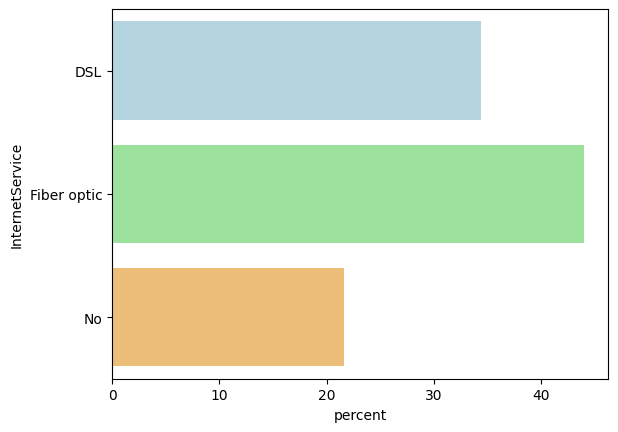

In [135]:
custom_palette = {"No": "#ffc266","DSL": "Lightblue","Fiber optic":"LightGreen"}
sns.countplot(data=df, y="InternetService",hue="InternetService" ,stat="percent" , palette=custom_palette)

# 9- what is our Contract types we provide? - names and ratio please

In [101]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [103]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

<Axes: ylabel='Contract'>

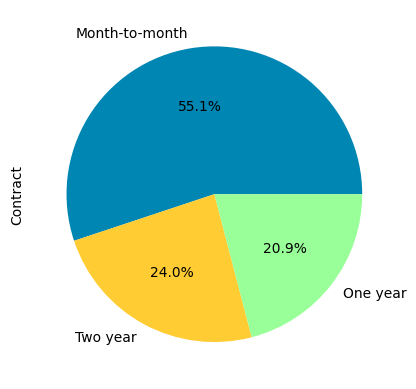

In [120]:
df['Contract'].value_counts().plot(kind="pie",autopct="%1.1f%%",colors=['#0086b3', '#ffcc33', '#99ff99'])

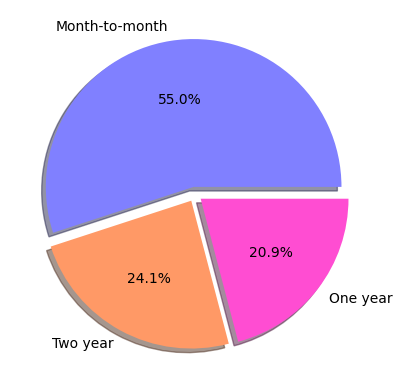

In [28]:
myexplode = [0.05, 0.05,0.05]
gender_counts = df['Contract'].value_counts()
mycolors = ['#8080ff', '#ff9966', '#ff4dd2']
plt.pie(gender_counts, labels=gender_counts.index, explode=myexplode, autopct='%1.1f%%', shadow = True , colors = mycolors)
plt.show() 

<Axes: xlabel='Contract', ylabel='percent'>

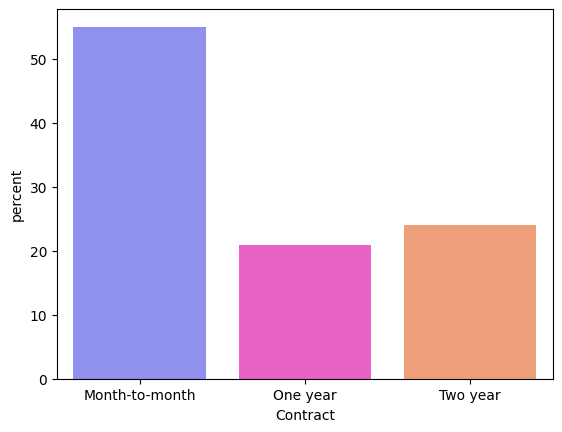

In [31]:
custom_palette = {"Month-to-month": "#8080ff","Two year":"#ff9966","One year":"#ff4dd2"}
sns.countplot(data=df, x="Contract",hue="Contract" ,stat="percent" , palette=custom_palette )

# 10- how many customers uses StreamingTV ?

In [106]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [113]:
df['StreamingTV'].loc[df['StreamingTV'] == "Yes"].value_counts()

StreamingTV
Yes    2707
Name: count, dtype: int64

# 11 - what is the ratio between users who streaming movies to StreamingTV subscribers?

In [115]:
df['StreamingMovies'].value_counts()

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

In [117]:
SM=df['StreamingMovies'].loc[df['StreamingMovies'] == "Yes"].value_counts()

In [121]:
ST=df['StreamingTV'].loc[df['StreamingTV'] == "Yes"].value_counts()

In [118]:
SM

StreamingMovies
Yes    2732
Name: count, dtype: int64

In [122]:
ST

StreamingTV
Yes    2707
Name: count, dtype: int64

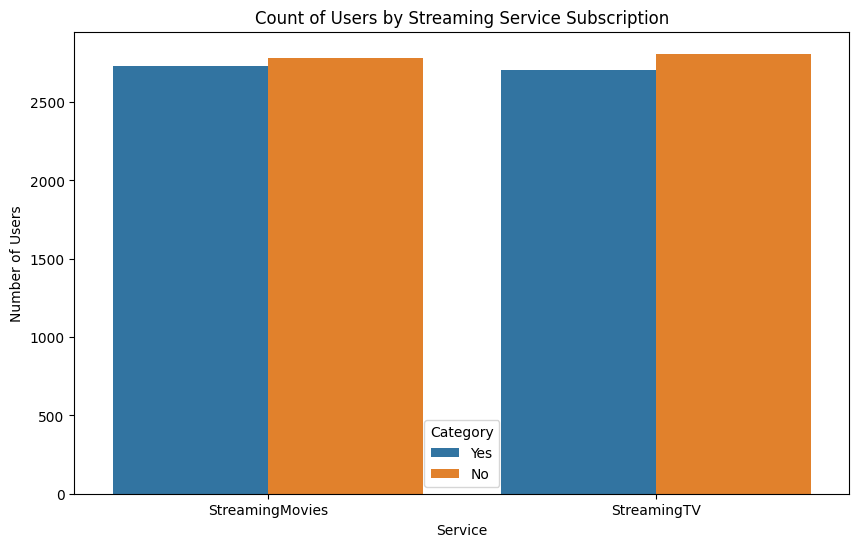

In [122]:
streaming_movies_count = df['StreamingMovies'].value_counts()
streaming_tv_count = df['StreamingTV'].value_counts()

# Create a DataFrame for visualization
data = pd.DataFrame({
    'Service': ['StreamingMovies', 'StreamingMovies', 'StreamingTV', 'StreamingTV'],
    'Category': ['Yes', 'No', 'Yes', 'No'],
    'Count': [streaming_movies_count.get('Yes', 0), streaming_movies_count.get('No', 0),
              streaming_tv_count.get('Yes', 0), streaming_tv_count.get('No', 0)]
})
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Service', y='Count', hue='Category', data=data)
plt.title('Count of Users by Streaming Service Subscription')
plt.ylabel('Number of Users')
plt.xlabel('Service')
plt.show()


# 12 - Is there a strong relationship between the monthly recharge rate and the dependents?

In [131]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

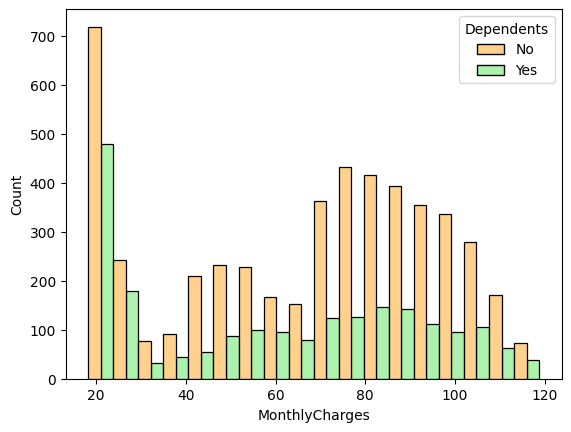

In [132]:
custom_palette = {"Yes": "LightGreen","No": "#ffc266"}
sns.histplot(data=df, x="MonthlyCharges", hue="Dependents", multiple="dodge",palette=custom_palette)

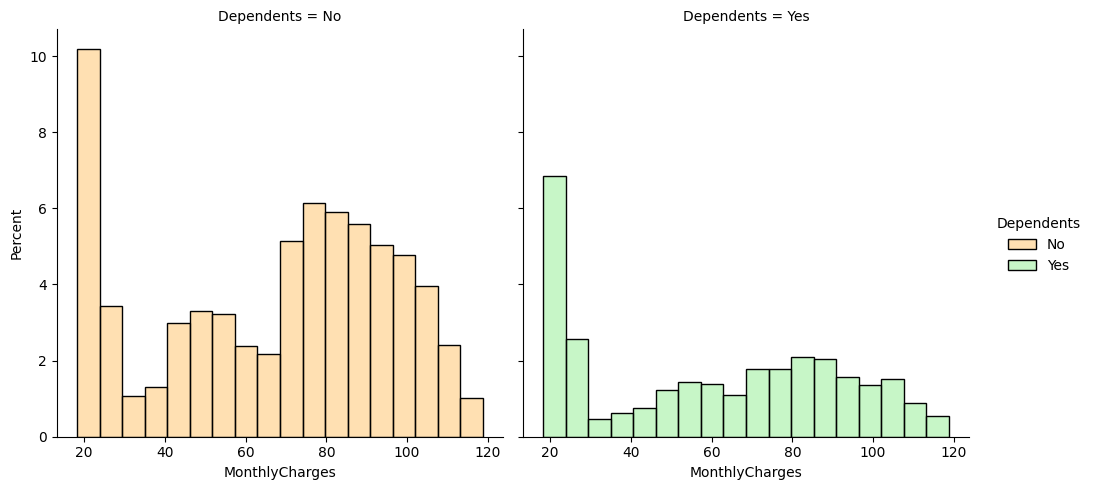

In [37]:
custom_palette = {"Yes": "LightGreen","No": "#ffc266"}
sns.displot(data=df, x="MonthlyCharges",hue="Dependents",col="Dependents" ,stat="percent" , palette=custom_palette )

# 13- who is the the most important customer in the company according to Monthly and Total charges?

In [145]:
df.loc[df['TotalCharges'].idxmax()]

customerID                9093-FPDLG
gender                        Female
SeniorCitizen                     No
Partner                           No
Dependents                        No
tenure                            11
PhoneService                     Yes
MultipleLines                     No
InternetService          Fiber optic
OnlineSecurity                    No
OnlineBackup                     Yes
DeviceProtection                 Yes
TechSupport                      Yes
StreamingTV                       No
StreamingMovies                  Yes
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod       Electronic check
MonthlyCharges                  94.2
TotalCharges                   999.9
Churn                             No
Name: 2845, dtype: object

In [146]:
df.loc[df['MonthlyCharges'].idxmax()]

customerID                         7569-NMZYQ
gender                                 Female
SeniorCitizen                              No
Partner                                   Yes
Dependents                                Yes
tenure                                     72
PhoneService                              Yes
MultipleLines                             Yes
InternetService                   Fiber optic
OnlineSecurity                            Yes
OnlineBackup                              Yes
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                           Yes
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                         118.75
TotalCharges                          8672.45
Churn                                      No
Name: 4586, dtype: object

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [32]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [161]:
df['Monthly-Total'] = df['MonthlyCharges'] + df['TotalCharges']

In [164]:
df.loc[df['Monthly-Total'].idxmax()]

customerID                         2889-FPWRM
gender                                   Male
SeniorCitizen                              No
Partner                                   Yes
Dependents                                 No
tenure                                     72
PhoneService                              Yes
MultipleLines                             Yes
InternetService                   Fiber optic
OnlineSecurity                            Yes
OnlineBackup                              Yes
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                           Yes
Contract                             One year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          117.8
TotalCharges                           8684.8
Churn                                     Yes
Monthly-Total                     

# 14- how many payment methods we provide? and what is the ratio between each others?

In [166]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

<Axes: ylabel='count'>

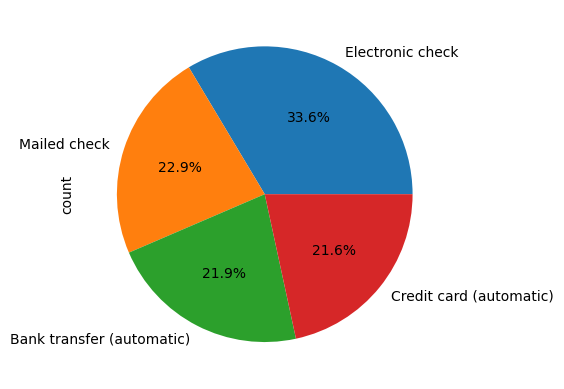

In [167]:
df['PaymentMethod'].value_counts().plot(kind="pie",autopct="%1.1f%%")

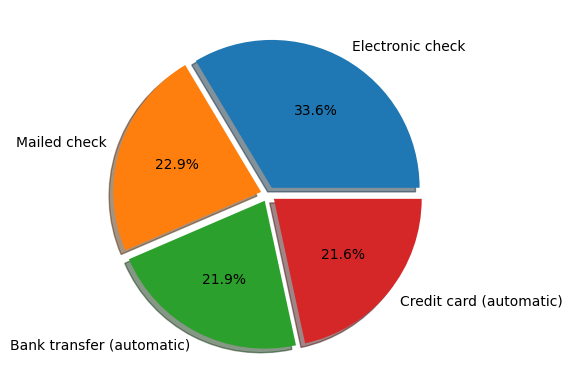

In [125]:
myexplode = [0.05, 0.05,0.05,0.05]
gender_counts = df['PaymentMethod'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, explode=myexplode, autopct='%1.1f%%', shadow = True )
plt.show() 

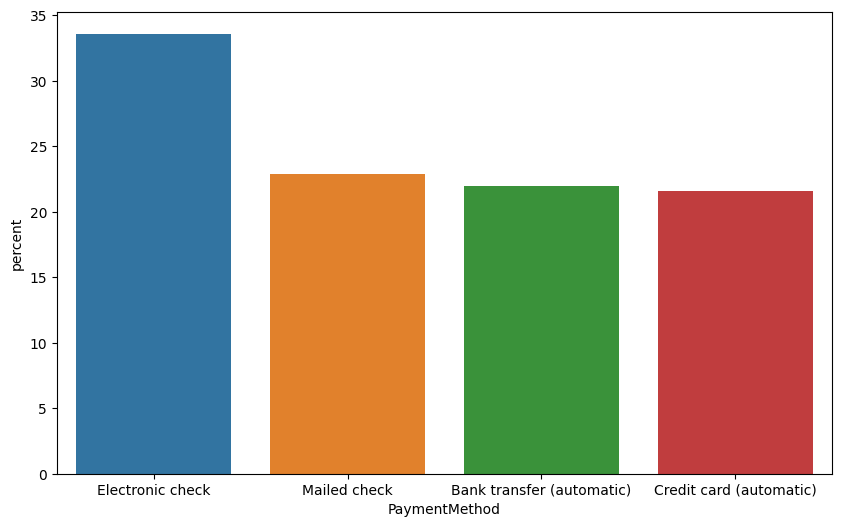

In [136]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="PaymentMethod",hue="PaymentMethod" ,stat="percent" )
plt.show()

# 15- what is our churn rate?

In [168]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

<Axes: ylabel='Churn'>

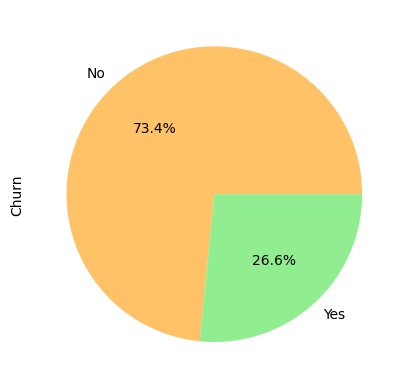

In [130]:
df['Churn'].value_counts().plot(kind="pie",autopct="%1.1f%%",colors=['#ffc266','LightGreen'])

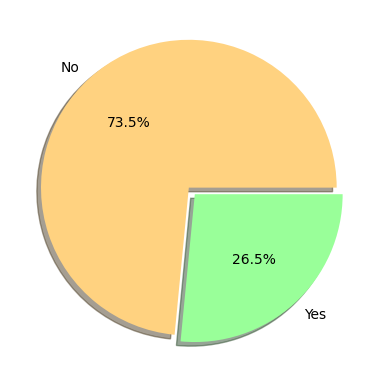

In [38]:
myexplode = [0.06, 0]
gender_counts = df['Churn'].value_counts()
mycolors = ["#ffd280", "#99ff99"]
plt.pie(gender_counts, labels=gender_counts.index, explode=myexplode, autopct='%1.1f%%', shadow = True , colors = mycolors)
plt.show() 

<Axes: xlabel='Churn', ylabel='percent'>

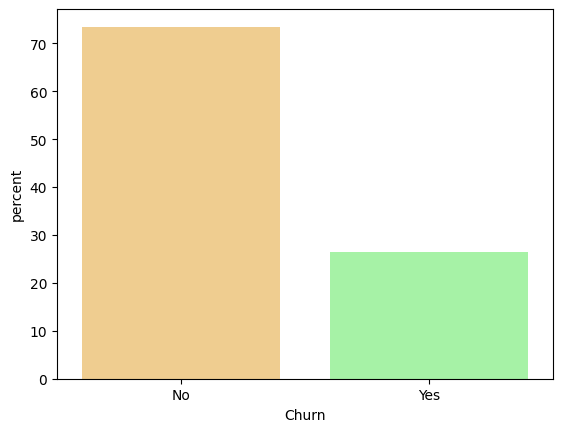

In [39]:
custom_palette = {"Yes": "#99ff99","No": "#ffd280"}
sns.countplot(data=df, x="Churn",hue="Churn" ,stat="percent" , palette=custom_palette , order=["No","Yes"])

# 16- what is the average monthly charge?

In [170]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Monthly-Total'],
      dtype='object')

In [171]:
sum = df['MonthlyCharges'].sum()

In [172]:
sum

456116.6

In [175]:
count=df['MonthlyCharges'].count()

In [176]:
avg= sum / count

In [177]:
avg

64.76169246059918

# 17- From the correlation matrix ,What is the relationship between the Senior Citizens and the monthly charging rate?

In [184]:
df.corr(numeric_only=True)

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


# 18-We want to give offers according to the gender and monthly charge categories, can you explain that? Using Visulization

In [185]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

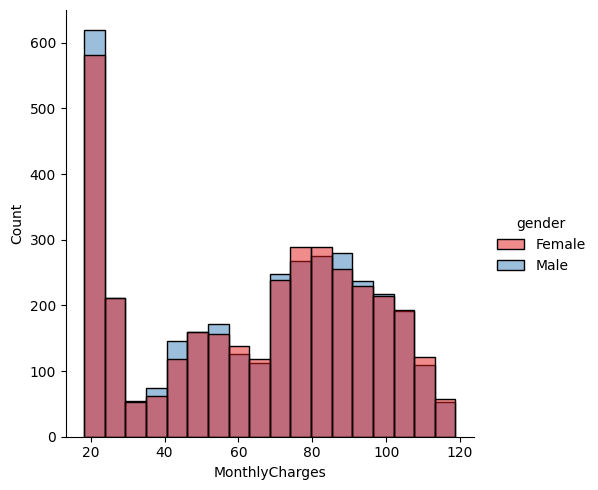

In [202]:
sns.displot(data=df, x="MonthlyCharges", hue="gender", palette='Set1')

In [192]:
df['MonthlyCharges'].value_counts()

MonthlyCharges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: count, Length: 1585, dtype: int64

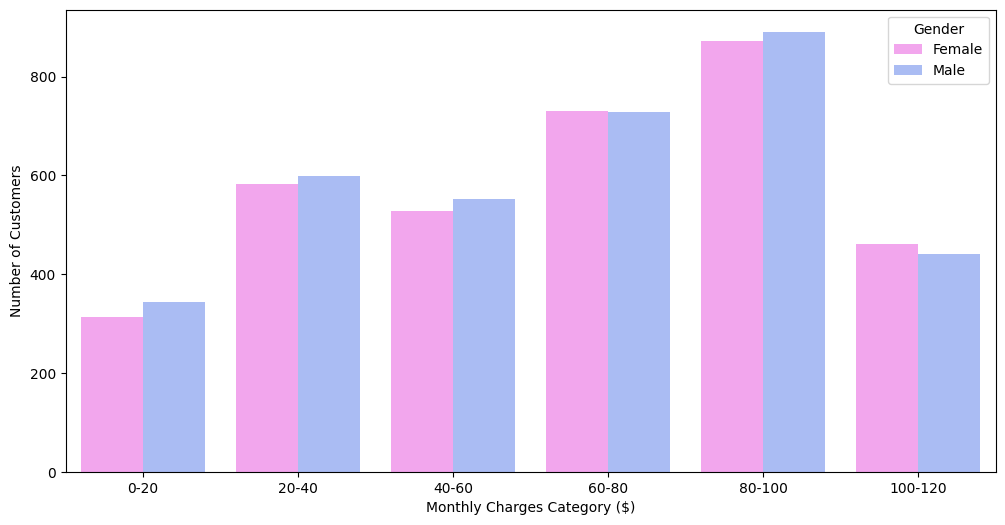

In [43]:
bins = [0, 20, 40, 60, 80, 100, 120]
labels = ['0-20', '20-40', '40-60', '60-80', '80-100', '100-120']
df['MonthlyChargesCategory'] = pd.cut(df['MonthlyCharges'], bins=bins, labels=labels)

# Plot the distribution of MonthlyChargesCategory by Gender
plt.figure(figsize=(12, 6))
custom_palette = {"Female": "#ff99f8","Male": "#9eb6ff"}
sns.countplot(x='MonthlyChargesCategory', hue='gender', data=df, palette=custom_palette)
# plt.title('Distribution of Monthly Charges Categories by Gender')
plt.xlabel('Monthly Charges Category ($)')
plt.ylabel('Number of Customers')
plt.legend(title='Gender')
plt.show()

In [197]:
df['MonthlyChargesCategory'].value_counts()

MonthlyChargesCategory
80-100     1764
60-80      1459
20-40      1182
40-60      1080
100-120     902
0-20        656
Name: count, dtype: int64

# 19 -We want to present offers by gender and Senior Citizen , could you explain that ? Using Visuliation

In [203]:
#(famale,0)(famale,1)(male,0)(male,1)

In [204]:
df['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [205]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [209]:
#(m,0)(f,0)(m,1)(m,0)
def calculate_offer(row):
    if row['gender'] == "Male" and row['SeniorCitizen'] == 0:
        return row['MonthlyCharges'] * 0.80
    elif row['gender'] == "Female" and row['SeniorCitizen'] == 0:
        return row['MonthlyCharges'] * 0.85
    elif row['gender'] == "Male" and row['SeniorCitizen'] == 1:
        return row['MonthlyCharges'] * 0.90
    else:
        return row['MonthlyCharges'] * 0.95

In [210]:
df['offers'] = df.apply(calculate_offer, axis=1)

In [212]:
df['offers'].value_counts()

offers
15.9600     32
16.0400     30
16.3200     25
17.0425     25
17.0850     24
            ..
104.9275     1
77.6475      1
25.5850      1
27.6000      1
17.9775      1
Name: count, Length: 3193, dtype: int64